<a href="https://colab.research.google.com/github/israelruiz2005/Analisando_os_Dados_do_Airbnb_Barcelona/blob/main/Analisando_os_Dados_do_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Barcelona *

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**


## Um pouco de história da cidade
<center><img alt="Vista cadetral Vista do Parc Güell" width="50%" src="https://viagemeturismo.abril.com.br/wp-content/uploads/2016/10/thinkstockphotos-158308055.jpeg?quality=70&strip=info&w=928?quality=70&strip=info&w=636"></center>

Barcelona é incomparavel, a capital da Catalunha, seduz, encanta, sendo a metropole da criatividade. Uma cidade que conhece seu passado e vivê o presente intensamente, preparando-se para o futuro, segundo wikipidia sua história estende-se ao longo de mais de 4000 anos. Atualmente caminha para ser uma cidade sustentável, com ciclovias, zonas exclusivas para pedestres e redução de veiculos na área central.

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##Dataset
Para que pudesse ser reproduzido, o dataset foi incorporado ao github, de forma que os dados sejam preservados, conforme sua primeira execução.

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/israelruiz2005/Analisando_os_Dados_do_Airbnb_Barcelona/main/Dataset/listings.csv",sep=",")


## Análise dos Dados


**Dicionário das variáveis**

* id - identificado único
* name - Nome
* host_id - id host
* host_name - nome host
* neighbourhood_group - O grupo de bairros é geocodificado usando a latitude e longitude em relação aos bairros, conforme definido por shapefiles digitais abertos ou públicos
* neighbourhood - A vizinhança como geocodificada usando a latitude e longitude em relação às vizinhanças conforme definido por shapefiles digitais abertos ou públicos.
* latitude
* longitude
* room_type - tipo de acomodação
* price - valor da diária em moeda local. Observe que o sinal $ pode ser usado independentemente da localidade
* minimum_nights - número mínimo de pernoites para o anúncio (as regras do calendário podem ser diferentes)
* number_of_reviews - O número de avaliações que a listagem tem
* last_review - A data da última/mais recente revisão
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - disponibilidade_x. A disponibilidade da listagem x dias no futuro, conforme determinado pelo calendário. Observe que um anúncio pode estar disponível porque foi reservado por um hóspede ou bloqueado pelo anfitrião.
* number_of_reviews_ltm
* license

#### Análise inicial do dataset
Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,102,1,22,2021-10-25,0.21,19,15,1,HUTB-002062
1,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,53,2021-10-27,0.41,2,46,1,HUTB-005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2020-02-22,0.50,3,7,0,HUTB-001722
3,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,214,4,159,2021-11-15,1.17,2,149,10,HUTB-001506
4,35318,Luxury room with private bathroom and balcony,152070,Michel,Ciutat Vella,el Barri Gòtic,41.38170,2.17730,Private room,93,3,242,2019-05-12,1.89,1,148,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Identificando informações gerais do dataset importado do Airbnb, cidade de Barcelona.

In [5]:
# identificar o volume de dados do DataFrame
print(f'Entradas:\t {df.shape[0]}')
print(f'Variáveis:\t {df.shape[1]}\n')

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 15707
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

O processo de verificação inicial do dataset exige uma analise das informações ausentes, o entendimento deles para posterior ajustes.
Abaixo verificamos:

* A coluna license esta com 35% dos seus valores ausentes
* As colunas reviews_per_month e last_review estão com 26% dos seus valores ausentes
* A coluna host_name e name também possui alguns valores ausentes. 

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

license                           35.786592
reviews_per_month                 26.001146
last_review                       26.001146
host_name                          0.229197
name                               0.063666
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

A identificação da distribuição das variáveis é mais perceptivel através da utilização de graficos, utilizaremos o histograma.

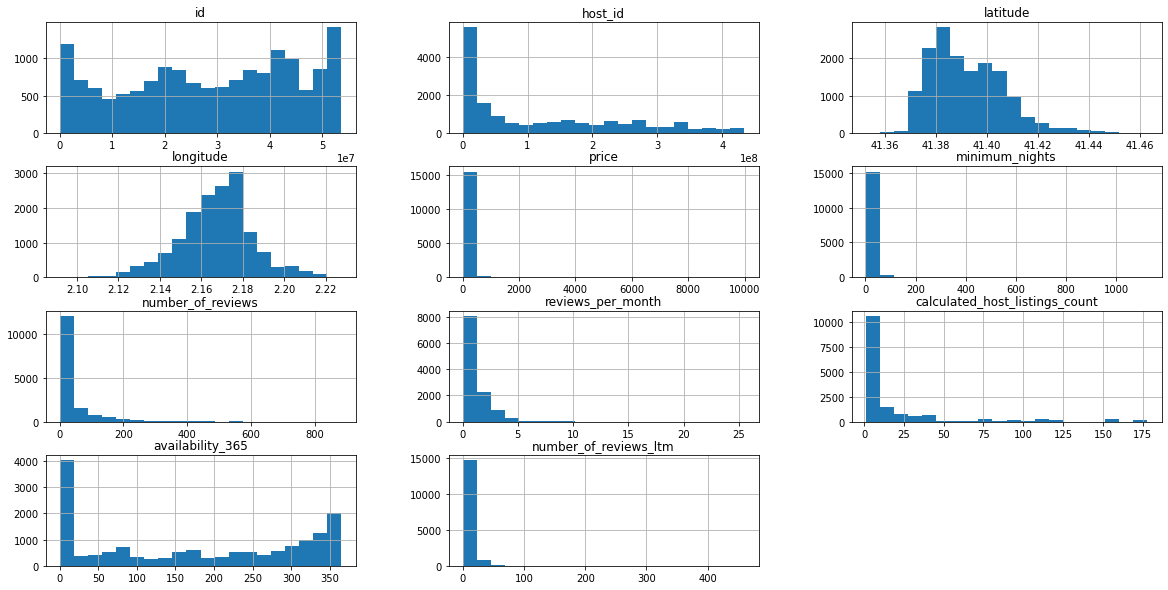

In [7]:
# plotar o histograma das variáveis numéricas

df.hist(bins=20, figsize=(20,10));

#### Ajustes no dataset

Ajustaremos alguns valores conforme abaixo:
* license - removeremos pois não alterar nossa analise
* price - filtraremos os valores removendo os acima de  5000
* minimum_nights - filtramos os valores acima de 15 dias, pois interessa apenas #turistas que ficaram no máxima duas semanas.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


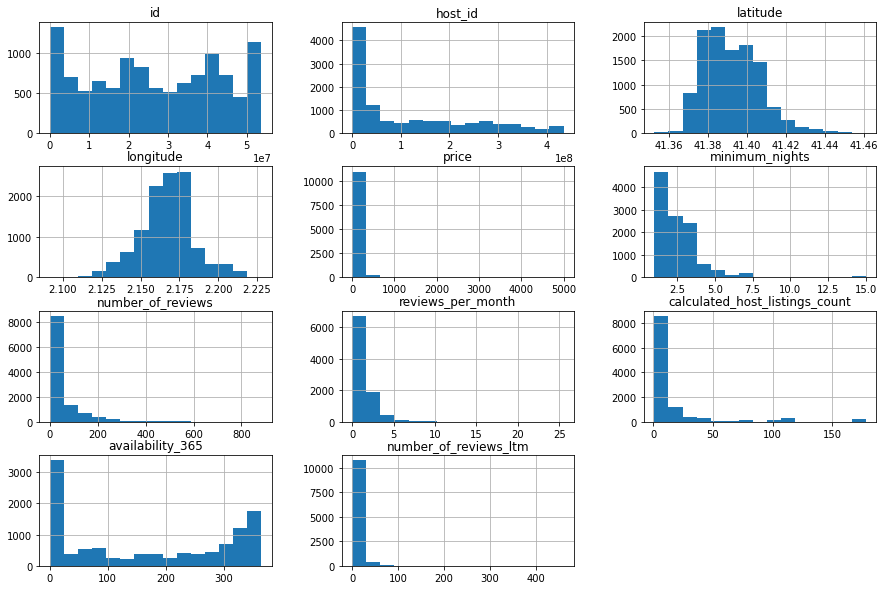

In [10]:
# Cria novo dataframe preservando os dataframe original
df_novo = df.copy()

# Cria filtros
filtro_price_5000 = df_novo.price > 5000
filtro_minimum_nights_15 = df_novo.minimum_nights > 15

# Aplica filtros
df_novo.drop(df_novo[filtro_price_5000].index, axis=0,inplace=True)
df_novo.drop(df_novo[filtro_minimum_nights_15].index, axis=0, inplace=True)

# Remove coluna license
df_novo.drop('license',axis=1,inplace=True)

# Imprime os gráficos de histograma
df_novo.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel em Barcelona?**

#### Usando a função describe() 

Conseguimos as informações gerais, media, desvio padrão, minimo, máximo etc, tanto do dataframe original como do novo que foi modificado.

In [11]:
# ver a média da coluna `price` e outras usando o dataframe original
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,15707.000000,15707.000000,15707.000000,11623.000000,15707.000000,15707.000000
mean,98.899472,14.435602,35.818234,1.073293,18.430063,174.710511
std,217.637472,36.058820,69.285212,1.278548,35.367392,138.378355
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.000000,1.000000,0.000000,0.170000,1.000000,13.000000
50%,68.000000,3.000000,5.000000,0.630000,3.000000,179.000000
75%,110.000000,30.000000,38.000000,1.570000,16.000000,316.000000
max,9999.000000,1124.000000,883.000000,25.490000,178.000000,365.000000


In [12]:
# ver a média da coluna `price` e outras usando o dataframe novo
df_novo[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11259.000000,11259.000000,11259.000000,9228.000000,11259.000000,11259.000000
mean,102.747846,2.261924,46.206768,1.248347,14.827693,167.803446
std,131.852714,1.786693,76.784316,1.348475,31.343976,142.544319
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,41.000000,1.000000,1.000000,0.270000,1.000000,0.000000
50%,77.000000,2.000000,13.000000,0.860000,3.000000,164.000000
75%,118.000000,3.000000,58.000000,1.800000,12.000000,320.000000
max,5000.000000,15.000000,883.000000,25.490000,178.000000,365.000000


#### Usando a função mean()

A média de preços do aluguel pode ser conseguida desta forma também 

In [14]:
print(f'Média das diárias no dataframe original:\t {df.price.mean()}')
print(f'Médias das diárias no dataframe modificado:\t {df_novo.price.mean()}\n')


Média das diárias no dataframe original:	 98.89947157318393
Médias das diárias no dataframe modificado:	 102.74784616751043



### **Q4. Qual a correlação existente entre as variáveis**

In [16]:
# criar uma matriz de correlação
corr = df_novo[['price', 'minimum_nights', 'number_of_reviews',
                 'reviews_per_month','calculated_host_listings_count',
                 'availability_365']].corr()

# mostrar a matriz de correlação

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.008642,-0.026708,-0.065515,0.080648,0.157749
minimum_nights,-0.008642,1.000000,0.053806,-0.048998,-0.100144,-0.086337
number_of_reviews,-0.026708,0.053806,1.000000,0.618518,-0.083827,0.094743
reviews_per_month,-0.065515,-0.048998,0.618518,1.000000,-0.056369,0.151351
calculated_host_listings_count,0.080648,-0.100144,-0.083827,-0.056369,1.000000,0.236986
availability_365,0.157749,-0.086337,0.094743,0.151351,0.236986,1.000000


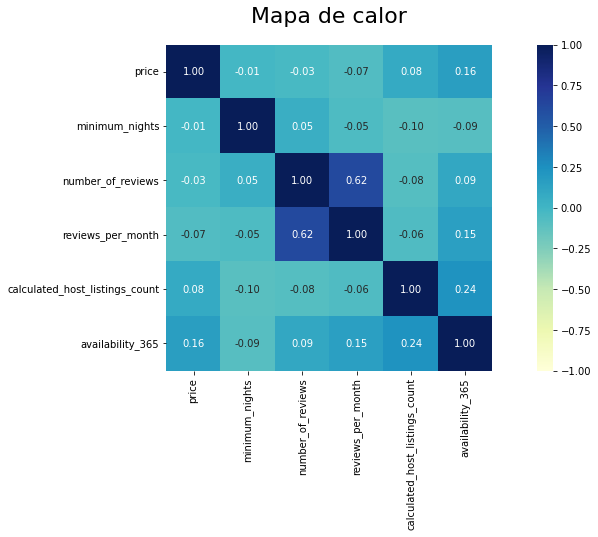

In [21]:
# plotar um heatmap a partir das correlações
# sns.heatmap(corr, cmap='YlGnBu', fmt='.2f', square=True, linecolor='white', annot=True);
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(corr,cmap='YlGnBu', fmt='.2f', square=True, vmin=-1, vmax=1, annot=True)
# Informando um título.
heatmap.set_title('Mapa de calor', fontdict={'fontsize':22}, pad=22);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb em Barcelona?**

Abaixo verificamos que os tipos de imóveis mais alugados são:

* Entire home/apt com 5471 locações ou 48,59%
* Priivate room com 5404 locações ou 47,99%

In [22]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_novo.room_type.value_counts()


Entire home/apt    5471
Private room       5404
Hotel room          217
Shared room         167
Name: room_type, dtype: int64

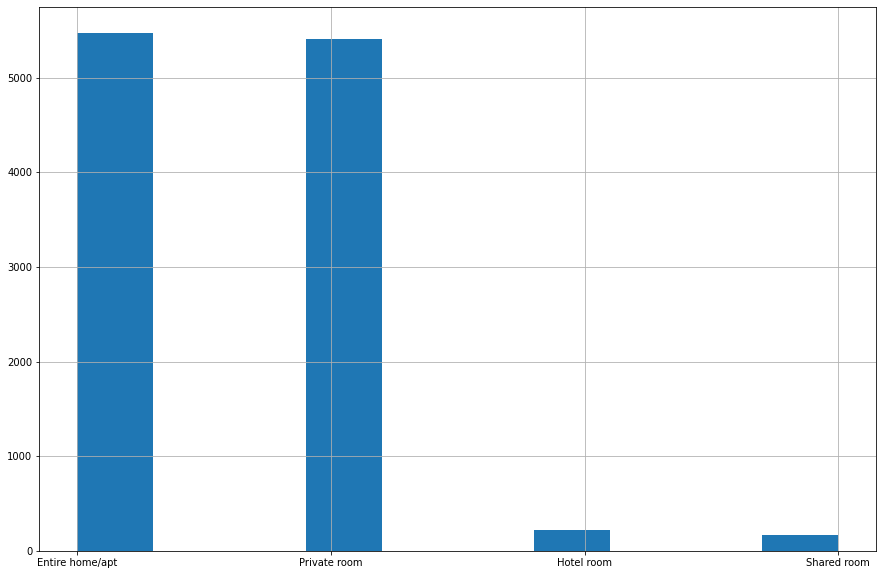

In [45]:
# Gerando um histrograma 
df_novo.room_type.hist(bins=10, figsize=(15,10));

In [46]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_novo.room_type.value_counts() / df_novo.shape[0])*100

Entire home/apt    48.592237
Private room       47.997158
Hotel room          1.927347
Shared room         1.483258
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara em Barcelona?**

Identificamos como localidade mais cara la Font d'en Fargues, seguida por duas outras localidades suas médias de preços de diárias estão em:

* la Font d'en Fargues com média de 284,000
* Diagonal Mar i el Front Maritim del Poblenou com média de 178,18
* Vallvidrera, el Tibidado i les Planes com média de 177,60

Neste caso nosso filtro inicial removeu imóveis com diarias superiores a 5000 e também com noites superiores a 15 dias.


In [47]:
# ver preços por bairros, na média
df_novo.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
la Font d'en Fargues                            284.000000
Diagonal Mar i el Front Marítim del Poblenou    178.186992
Vallvidrera, el Tibidabo i les Planes           177.600000
la Vila Olímpica del Poblenou                   156.049180
la Dreta de l'Eixample                          148.314644
el Congrés i els Indians                        137.380952
l'Antiga Esquerra de l'Eixample                 131.143284
les Tres Torres                                 127.105263
Pedralbes                                       116.352941
les Corts                                       115.522727
Name: price, dtype: float64

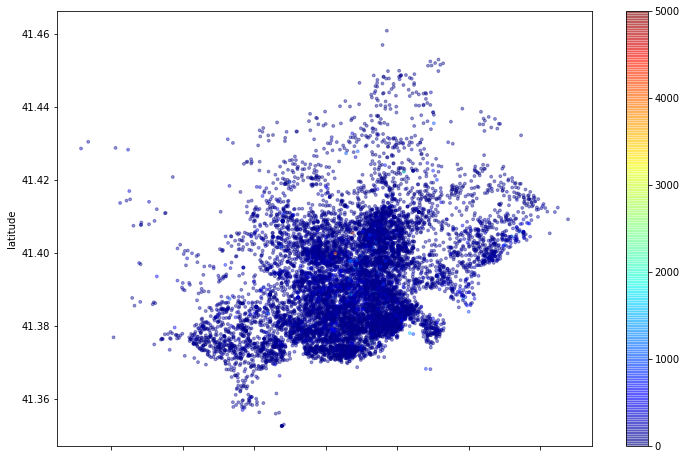

In [49]:
# plotar os imóveis pela latitude-longitude
df_novo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_novo['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Analisando os dataframes observamos que há uma diferença grande na média de numeros de noites sendo:

* Para o dataframe original a média de 14,43 dias
* Para o dataframe novo que considera apenas diarias abaixo de 5000 e peridos inferiores a 15 dias a média ficam em 2,25 dias.

In [54]:
# ver a média da coluna `minimum_nights``

print(f'Minimo de noites média no dataframe original:\t {df.minimum_nights.mean()}')
print(f'Minimo de noites média no dataframe novo:\t {df_novo.minimum_nights.mean()}')

Minimo de noites média no dataframe original:	 14.435601960909148
Minimo de noites média no dataframe novo:	 2.261923794297895


## Conclusões
